### Business Understanding

### Data Understanding


### Data Preparation

In [423]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

%matplotlib inline

In [424]:
#expanding output diaplay for columns and rows
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

In [425]:
# Load data

df_calendar = pd.read_csv('Data/calendar.csv')
df_listing = pd.read_csv('Data/listings.csv')
df_review = pd.read_csv('Data/reviews.csv')

##### Claendar data

In [426]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [427]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [428]:
df_calendar.date.max()

'2017-01-02'

In [429]:
df_calendar.date.min()

'2016-01-04'

In [430]:
#keeping the year 2016 only
df_calendar_cleaned = df_calendar[df_calendar.date <= '2016-12-31']
df_calendar_cleaned

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393563,10208623,2016-12-27,f,NaN
1393564,10208623,2016-12-28,f,NaN
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN


In [431]:
df_calendar_cleaned["date"].to_string

<bound method Series.to_string of 0          2016-01-04
1          2016-01-05
2          2016-01-06
3          2016-01-07
4          2016-01-08
              ...    
1393563    2016-12-27
1393564    2016-12-28
1393565    2016-12-29
1393566    2016-12-30
1393567    2016-12-31
Name: date, Length: 1385934, dtype: object>

In [432]:
df_calendar_cleaned['date_month'] = pd.DatetimeIndex(df_calendar_cleaned['date']).month
# df_calendar_cleaned.loc[[],['date_month']] = pd.DatetimeIndex(df_calendar_cleaned['date']).month

df_calendar_cleaned['date_quarter'] = pd.DatetimeIndex(df_calendar_cleaned['date']).quarter
# df_calendar_cleaned.loc[[],['date_quarter']] = pd.DatetimeIndex(df_calendar_cleaned['date']).quarter

df_calendar_cleaned['date_year'] = pd.DatetimeIndex(df_calendar_cleaned['date']).year
# df_calendar_cleaned.loc[[],['date_year']] = pd.DatetimeIndex(df_calendar_cleaned['date']).year

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\3389895112.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\3389895112.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\3389895112.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [433]:
df_calendar_cleaned.head()

,listing_id,date,available,price,date_month,date_quarter,date_year
0,241032,2016-01-04,t,$85.00,1,1,2016
1,241032,2016-01-05,t,$85.00,1,1,2016
2,241032,2016-01-06,f,NaN,1,1,2016
3,241032,2016-01-07,f,NaN,1,1,2016
4,241032,2016-01-08,f,NaN,1,1,2016


In [434]:
df_calendar_cleaned['price'] = df_calendar_cleaned['price'].str.replace('$', '')

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\2476187543.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\2476187543.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [435]:
# convert string to float
df_calendar_cleaned['price'] = [float(str(i).replace(",", "")) for i in df_calendar_cleaned['price']]

C:\Users\Abdulrahman Saad\AppData\Local\Temp\ipykernel_732\3313067750.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [436]:
df_calendar_cleaned.head()

,listing_id,date,available,price,date_month,date_quarter,date_year
0,241032,2016-01-04,t,85.0,1,1,2016
1,241032,2016-01-05,t,85.0,1,1,2016
2,241032,2016-01-06,f,NaN,1,1,2016
3,241032,2016-01-07,f,NaN,1,1,2016
4,241032,2016-01-08,f,NaN,1,1,2016


##### Listing data

In [437]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [438]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [439]:
# drop unneeded columns
df_listing_cleaned = df_listing.drop(columns=['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url',
                                              'host_thumbnail_url','host_picture_url','calendar_last_scraped','requires_license','license'])

In [440]:
df_listing_cleaned.isnull().sum()

id                                     0
name                                   0
summary                              177
space                                569
description                            0
neighborhood_overview               1032
notes                               1606
transit                              934
host_id                                0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_total_listings_count              2
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
street                                 0
neighbourhood   

In [441]:
df_listing_cleaned['price'] = [float(str(i).replace('$', '').replace(",", "")) for i in df_listing['price']]

In [442]:
df_listing_cleaned['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [443]:
df_listing_cleaned['neighbourhood_cleansed'].value_counts()

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Ravenna                       67
Mann                          67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
North Queen Anne              54
Green Lake                    54
Leschi                        53
Atlantic                      53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park                   44
Maple Leaf

##### Review data

In [444]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [445]:
df_review.date.min()

'2009-06-07'

In [446]:
df_review.date.max()

'2016-01-03'

In [447]:
#drop unneeded columns

### Data Analysis

#### Q1

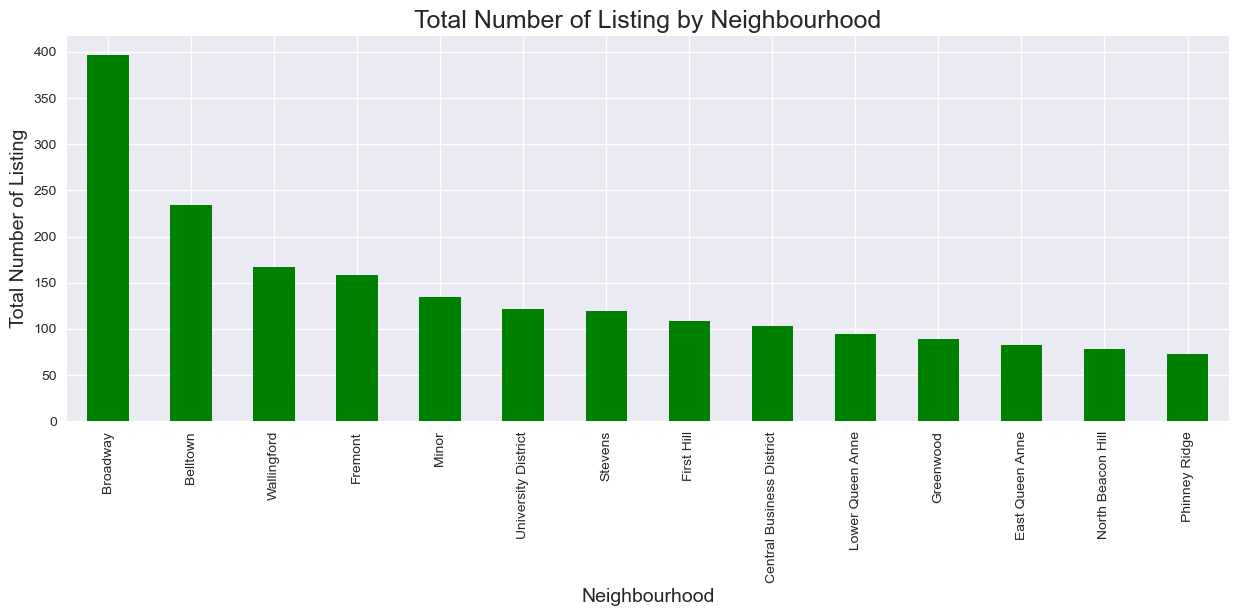

In [448]:
plt.figure(figsize=(15,5))


df_listing_cleaned['neighbourhood_cleansed'].value_counts().loc[lambda x : x>70].plot(kind='bar',color='green',sort_columns=False)
plt.title('Total Number of Listing by Neighbourhood', fontsize = 18);
plt.ylabel('Total Number of Listing', fontsize = 14);
plt.xlabel('Neighbourhood', fontsize = 14);

plt.style.use('seaborn')

In [449]:
heatmap = px.scatter_mapbox(df_listing_cleaned, lat='latitude', lon='longitude',mapbox_style="stamen-terrain",color='neighbourhood_cleansed');
heatmap

In [456]:
Q1_df

,,price
neighbourhood_cleansed,property_type,
South Delridge,House,81.125000
Riverview,House,81.500000
Victory Heights,House,81.636364
North Delridge,Apartment,83.666667
Bitter Lake,House,87.700000
South Park,House,90.000000
South Beacon Hill,House,91.000000
Roxhill,House,92.500000
North College Park,Apartment,93.500000


In [510]:
# Group by gender and user type
Q1_df = df_listing_cleaned.groupby(['neighbourhood_cleansed','property_type']).price.mean().sort_values().groupby(level=0).tail(1).to_frame()

#Change the name of column to Number of Trips
Q1_df.columns = ['price']

# reset the index
Q1_df = Q1_df.reset_index()

#Sort values by the number of trips
Q1_df.sort_values(by='price',inplace=True,ascending=False)

In [512]:
Q1_df.columns

Index(['neighbourhood_cleansed', 'property_type', 'price'], dtype='object')

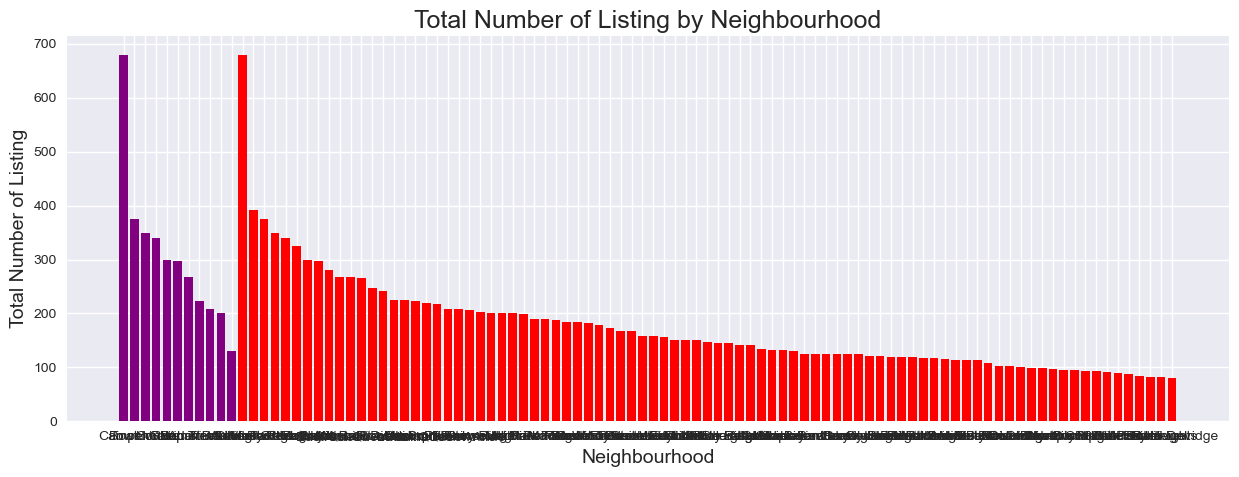

In [517]:

plt.figure(figsize=(15,5))

plt.bar(x = Q1_df['property_type'], height = Q1_df['price'], color='purple');
plt.bar(x = Q1_df['neighbourhood_cleansed'], height = Q1_df['price'], color='red');

# df_listing_cleaned['neighbourhood_cleansed'].value_counts().loc[lambda x : x>70].plot(kind='bar',color='green',sort_columns=False)
plt.title('Total Number of Listing by Neighbourhood', fontsize = 18);
plt.ylabel('Total Number of Listing', fontsize = 14);
plt.xlabel('Neighbourhood', fontsize = 14);

plt.style.use('seaborn')

### Modeling

### Evaluation

### Deployment 

,,price
neighbourhood_cleansed,property_type,
South Delridge,House,81.125000
Riverview,House,81.500000
Victory Heights,House,81.636364
North Delridge,Apartment,83.666667
Bitter Lake,House,87.700000
